<h2>In this study, we developed a method that combined five groups of features and three commonly used datasets to predict deleterious variants in non-coding regions.</h2>

<h3>Here we divided the code into two parts, the first part of which is the process of our study, the second part is the process of the comparison of Model 3 with other methods.</h3>

<h4>This script corresponds to the "Dataset selection for modeling" section of our manuscript. And this script runs from top to bottom, and the first part is finished before the second part is run.</h4>

In [1]:
import re, os, sys
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.externals import joblib

<h4>The third dataset is divided into two parts (i.e. the training set and validation set, detailed in the "Material and methods" section and Figure 3 of the manuscript).

<h4>First, load the training set.</h4>

<h4>Notice: In this file (i.e. "training_set"), each line is a variant. And the first five columns in turn represent: chromID, position, reference allele, alternative allele, true label; from the sixth column to the last column are the corresponding 937 feature values.</h4>

In [2]:
labellist_tr = []
fealist_tr = []
with open("../Dataset/training_set",'rt') as f:
    for line in f:
        line = line.strip()
        li = re.split("\s+",line)
        label_tr = int(li[4])
        features_tr = [float(m) for m in li[5:]]
        labellist_tr.append(label_tr)
        fealist_tr.append(features_tr)
        
labelArray_tr = np.array(labellist_tr)
feaArray_tr = np.array(fealist_tr)

<h4>Build a random forest model. We experimented with different numbers of decision trees in the random forest and used 400 trees as the final parameter after the grid search by ranging the number of trees from 100 to 1000 (step size: 100), and max_features was set to default value (i.e. max_features = "sqrt") according to the work of Gelfman and Gao.</h4>

In [14]:
rfmodel=RandomForestClassifier(oob_score=True, random_state=10, n_estimators= 400,max_features = 'sqrt')
rfmodel.fit(feaArray_tr,labelArray_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=True, random_state=10, verbose=0, warm_start=False)

<h4>Below we compared this study with other methods.</h4>

<h4>Notice: In this file (i.e. "validation_set_predict_proba"), each line is a variant. And the first two columns in turn represent: true label, and prediction score.</h4>

In [3]:
va_labelList = []
va_Score = []
with open("../Other methods score/validation_set_predict_proba",'rt') as f1:
    for line1 in f1:
        line1 = line1.strip()
        li1 = re.split("\s+",line1)
        label_te = int(li1[0])
        score_va = float(li1[-1])
        va_labelList.append(label_te)
        va_Score.append(score_va)
        
va_labelArray = np.array(va_labelList)
va_ScoreArray = np.array(va_Score)
fpr_va,tpr_va,thresholds_va = metrics.roc_curve(va_labelArray,va_ScoreArray,pos_label = 1)
AUC_va = metrics.auc(fpr_va,tpr_va)

<h4>Load the score of GWAVA on the test set and calculate the AUC of test set. The data in the test_set_GWAVA_predict_proba is extracted from the GWAVA genome-wide score file, and a complete set of GWAVA pre-computed scores are available for download as a BED format file from this <a href="https://www.sanger.ac.uk/sanger/StatGen_Gwava">link</a>.</h4>

In [4]:
label_glist = []
Unmatchedscore = []
TSSscore = []
Regionscore = []
with open("../Other methods score/validation_set_GWAVA_predict_proba",'rt') as fg:
    for lineg in fg:
        lineg = lineg.strip()
        lig = re.split("\s+",lineg)
        label_g = int(lig[0])
        label_glist.append(label_g)
        region_s = float(lig[1])
        TSS_s = float(lig[2])
        Unmatched_s = float(lig[-1])
        Unmatchedscore.append(Unmatched_s)
        TSSscore.append(TSS_s)
        Regionscore.append(region_s)
label_gArray = np.array(label_glist)
UnmatcheArray = np.array(Unmatchedscore) 
TSSArray = np.array(TSSscore)
RegionArray = np.array(Regionscore)
fpr_gUnmatched,tpr_gUnmatched,thresholds_gUnmatched = metrics.roc_curve(label_gArray,UnmatcheArray,pos_label = 1)
AUC_gUnmatched = metrics.auc(fpr_gUnmatched,tpr_gUnmatched)
fpr_gregion,tpr_gregion,thresholds_gregion = metrics.roc_curve(label_gArray,RegionArray,pos_label = 1)
AUC_gregion = metrics.auc(fpr_gregion,tpr_gregion)
fpr_gTSS,tpr_gTSS,thresholds_gTSS = metrics.roc_curve(label_gArray,TSSArray,pos_label = 1)
AUC_gTSS = metrics.auc(fpr_gTSS,tpr_gTSS)

<h4>Load the score of CADD v1.4 on the test set and calculate the AUC of test set. The data in the test_set_CADDv14_predict_proba is extracted from the CADD genome-wide score file, and the CADD pre-computed genome-wide score file is obtained from this <a href="https://krishna.gs.washington.edu/download/CADD/v1.4/GRCh37/">link</a>.</h4>

In [5]:
label_C14list = []
CADD14score = []
with open("../Other methods score/validation_set_CADDv14__predict_proba",'rt') as fC:
    for lineC in fC:
        liC = re.split("\s+",lineC.strip())
        label_C = int(liC[-2])
        CADD_s = float(liC[-1])
        label_C14list.append(label_C)
        CADD14score.append(CADD_s)
label_C14Array = np.array(label_C14list)
CADD14scoreArray = np.array(CADD14score)
fpr_C14,tpr_C14,thresholds_C14 = metrics.roc_curve(label_C14Array,CADD14scoreArray,pos_label = 1)
AUC_C14 = metrics.auc(fpr_C14,tpr_C14)

<h4>Load the score of CADD v1.6 on the test set and calculate the AUC of test set. The data in the test_set_CADDv16_predict_proba is extracted from the CADD genome-wide score file, and the CADD pre-computed genome-wide score file is obtained from this <a href="https://krishna.gs.washington.edu/download/CADD/v1.6/GRCh37/">link</a>.</h4>

In [6]:
label_C16list = []
CADD16score = []
with open("../Other methods score/validation_set_CADDv16__predict_proba",'rt') as fC:
    for lineC in fC:
        liC = re.split("\s+",lineC.strip())
        label_C = int(liC[-2])
        CADD_s = float(liC[-1])
        label_C16list.append(label_C)
        CADD16score.append(CADD_s)
label_C16Array = np.array(label_C16list)
CADD16scoreArray = np.array(CADD16score)
fpr_C16,tpr_C16,thresholds_C16 = metrics.roc_curve(label_C16Array,CADD16scoreArray,pos_label = 1)
AUC_C16 = metrics.auc(fpr_C16,tpr_C16)

<h4>Load the score of LINSIGHT on the test set and calculate the AUC of test set. The data in the test_set_LINSIGHT_predict_proba is obtained by executing the LINSIGHT source code, and the source code can be downloaded from this <a href="https://github.com/CshlSiepelLab/LINSIGHT">link</a>.</h4>

In [7]:
label_Llist = []
Lscore = []
with open("../Other methods score/validation_set_LINSIGHT_predict_proba",'rt') as fL:
    for lineL in fL:
        liL = re.split("\s+",lineL.strip())
        label_L = int(liL[0])
        L_score = float(liL[-1])
        label_Llist.append(label_L)
        Lscore.append(L_score)
label_LArray = np.array(label_Llist)
LscoreArray = np.array(Lscore)
fpr_L,tpr_L,thresholds_L = metrics.roc_curve(label_LArray,LscoreArray,pos_label = 1)
AUC_L = metrics.auc(fpr_L,tpr_L)

<h4>Load the score of GenoCanyon on the test set and calculate the AUC of test set. The data in the test_set_GenoCanyon_predict_proba is extracted from the GenoCanyon genome-wide score file, and the GenoCanyon pre-computed genome-wide score file is obtained from this <a href="http://genocanyon.med.yale.edu/GenoCanyon_Downloads.html">link</a>.</h4>

In [8]:
label_Glist = []
GenoScore = []
with open("../Other methods score/validation_set_GenoCanyon_predict_proba",'rt') as fG:
    for lineG in fG:
        lineG = lineG.strip()
        liG = re.split("\s+",lineG)
        label_G = int(liG[0])
        Geno_S = float(liG[-1])
        label_Glist.append(label_G)
        GenoScore.append(Geno_S)
label_GArray = np.array(label_Glist)
GenocanyonArray = np.array(GenoScore)
fpr_G,tpr_G,thresholds_G = metrics.roc_curve(label_GArray,GenocanyonArray,pos_label = 1)
AUC_G = metrics.auc(fpr_G,tpr_G)

<h4>Load the score of funseq2 on the test set and calculate the AUC of test set. The data in the test_set_Funseq2_predict_proba is extracted from the Funseq2 genome-wide score file, and the Funseq2 pre-computed genome-wide score file is obtained from this <a href="http://org.gersteinlab.funseq.s3-website-us-east-1.amazonaws.com/funseq2.1.2/">link</a>.</h4>

In [9]:
label_flist = []
funseqscore = []
with open("../Other methods score/validation_set_Funseq2_predict_proba",'rt') as ff:
    for linef in ff:
        linef = linef.strip()
        lif = re.split("\s+",linef)
        label_f = int(lif[-2])
        score_f = float(lif[-1])
        label_flist.append(label_f)
        funseqscore.append(score_f)
label_fArray = np.array(label_flist)
funseqscoreArray = np.array(funseqscore)
fpr_f,tpr_f,thresholds_f = metrics.roc_curve(label_fArray,funseqscoreArray,pos_label = 1)
AUC_f = metrics.auc(fpr_f,tpr_f)

<h4>Load the score of FATHMM on the test set and calculate the AUC of test set. The data in the test_set_fathmm_predict_proba is obtained by executing the FATHMM source code, and the source code can be downloaded from this <a href="http://fathmm.biocompute.org.uk/fathmmMKL.htm">link</a>.</h4>

In [10]:
label_FAlist = []
FATHMMscore = []
with open("../Other methods score/validation_set_fathmm__predict_proba",'rt') as fF:
    for lineF in fF:
        lineF = lineF.strip()
        liF = re.split("\s+",lineF)
        label_F = int(liF[0])
        score_F = float(liF[-1])
        label_FAlist.append(label_F)
        FATHMMscore.append(score_F)
label_FAArray = np.array(label_FAlist)
FATHMMscoreArray = np.array(FATHMMscore)
fpr_FA,tpr_FA,thresholds_FA = metrics.roc_curve(label_FAArray,FATHMMscoreArray,pos_label = 1)
AUC_FA = metrics.auc(fpr_FA,tpr_FA)        

<h4>Load the score of PhD-SNPg on the test set and calculate the AUC of test set. The data in the test_set_PhD_SNPg_predict_proba is obtained by executing the PhD-SNPg source code, and the source code can be downloaded from this <a href="https://snps.biofold.org/phd-snpg/">link</a>.</h4>

In [11]:
labellist_PhD_SNPg = []
PhD_SNPgpredictproba = []
f = open("../Other methods score/validation_set_PhD_SNPg_predict_proba",'rt')
for line in f:
	line = line.strip()
	li = re.split("\t",line)
	labellist_PhD_SNPg.append(int(li[0]))
	PhD_SNPgpredictproba.append(float(li[-1]))
f.close()
fpr_PhD_SNPg, tpr_PhD_SNPg, thresholds_PhD_SNPg = metrics.roc_curve(labellist_PhD_SNPg, PhD_SNPgpredictproba, pos_label = 1)
AUC_PhD_SNPg= metrics.auc(fpr_PhD_SNPg, tpr_PhD_SNPg)

<h4>Comparison of the performances of our study and other methods.</h4>

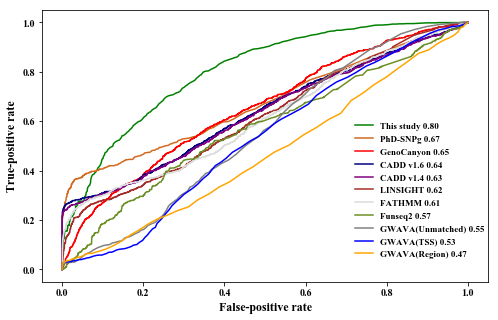

In [13]:
plt.figure(figsize = (8,5))
plt.plot(fpr_va,tpr_va,"green",label = "This study %.2f"%AUC_va)
plt.plot(fpr_PhD_SNPg,tpr_PhD_SNPg,"chocolate",label = "PhD-SNPg %.2f"%AUC_PhD_SNPg)
plt.plot(fpr_G,tpr_G,"red",label = "GenoCanyon %.2f"%AUC_G)
plt.plot(fpr_C16,tpr_C16,"navy",label = "CADD v1.6 %.2f"%AUC_C16)
plt.plot(fpr_C14,tpr_C14,"purple",label = "CADD v1.4 %.2f"%AUC_C14)
plt.plot(fpr_L,tpr_L,"brown",label = "LINSIGHT %.2f"%AUC_L)
plt.plot(fpr_FA,tpr_FA,"gainsboro",label = "FATHMM %.2f"%AUC_FA)
plt.plot(fpr_f,tpr_f,"olivedrab",label = "Funseq2 %.2f"%AUC_f)
plt.plot(fpr_gUnmatched,tpr_gUnmatched,"gray",label = "GWAVA(Unmatched) %.2f"%AUC_gUnmatched)
plt.plot(fpr_gTSS,tpr_gTSS,"blue",label = "GWAVA(TSS) %.2f"%AUC_gTSS)
plt.plot(fpr_gregion,tpr_gregion,"orange",label = "GWAVA(Region) %.2f"%AUC_gregion)
plt.legend(bbox_to_anchor=(1.0,0.6), loc=1, prop={'family' : 'Times New Roman', 'size'   : 9}, borderaxespad=0.,frameon=False)
plt.xlabel("False-positive rate",  fontdict={'family' : 'Times New Roman', 'size'   : 12})
plt.ylabel("True-positive rate",  fontdict={'family' : 'Times New Roman', 'size'   : 12})
plt.yticks(fontproperties = 'Times New Roman', size = 10)
plt.xticks(fontproperties = 'Times New Roman', size = 10)
plt.show()